In [19]:
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [20]:
df = pd.read_csv('C:/Users/Honor/Music/1 задание.csv', sep=';', encoding='windows-1251')

In [21]:
df.head()

,t,"реализация, т",квартал
0,1,"29,9",1
1,2,"55,8",2
2,3,"53,9",3
3,4,"28,5",4
4,5,"28,1",1


In [22]:
df.dtypes

t                 int64
реализация, т    object
квартал           int64
dtype: object

In [23]:
df['реализация, т'] = df['реализация, т'].str.replace(',','.')

In [24]:
df['реализация, т'] = df['реализация, т'].astype(float)

<AxesSubplot:>

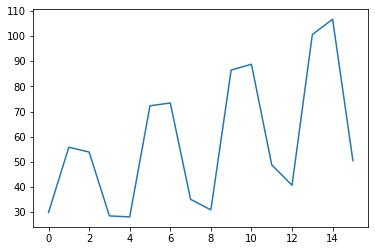

In [25]:
df['реализация, т'].plot()

Амплитуда сезонных колебаний носит непостоянный характер(возрастает), поэтому строим мультипликативную модель

In [31]:
df['S4cc'] = df['реализация, т'].rolling(4).mean()
df['центр'] = df.S4cc.rolling(2).mean().shift(-2)
df['оценка_сез_комп'] = df['реализация, т']/df['центр']

,t,"реализация, т",квартал,S4cc,центр,оценка_сез_комп
0,1,29.9,1,NaN,NaN,NaN
1,2,55.8,2,NaN,NaN,NaN
2,3,53.9,3,NaN,41.8000,1.289474
3,4,28.5,4,42.025,43.6375,0.653108
4,5,28.1,1,41.575,48.1375,0.583744
5,6,72.3,2,45.700,51.4000,1.406615
6,7,73.4,3,50.575,52.5750,1.396101
7,8,35.1,4,52.225,54.7000,0.641682
8,9,30.9,1,52.925,58.4000,0.529110
9,10,86.5,2,56.475,62.0375,1.394318


Расчет сезонной компоненты

In [32]:
sum_S1 = df.query('квартал==1').оценка_сез_комп.sum()
sum_S2 = df.query('квартал==2').оценка_сез_комп.sum()
sum_S3 = df.query('квартал==3').оценка_сез_комп.sum()
sum_S4 = df.query('квартал==4').оценка_сез_комп.sum()
avg_S1 = sum_S1/4
avg_S2 = sum_S2/4
avg_S3 = sum_S3/4
avg_S4 = sum_S4/4
cor_coef = 1/((avg_S1+avg_S2+avg_S3+avg_S4)/4)
S1 = avg_S1*cor_coef
S2 = avg_S2*cor_coef
S3 = avg_S3*cor_coef
S4 = avg_S4*cor_coef

In [33]:
df['S'] = df.квартал.apply(lambda x: S1 if x==1 else S2 if x==2 else S3 if x==3 else S4)

,t,"реализация, т",квартал,S4cc,центр,оценка_сез_комп,S
0,1,29.9,1,NaN,NaN,NaN,0.564349
1,2,55.8,2,NaN,NaN,NaN,1.396344
2,3,53.9,3,NaN,41.8000,1.289474,1.362518
3,4,28.5,4,42.025,43.6375,0.653108,0.676789
4,5,28.1,1,41.575,48.1375,0.583744,0.564349
5,6,72.3,2,45.700,51.4000,1.406615,1.396344
6,7,73.4,3,50.575,52.5750,1.396101,1.362518
7,8,35.1,4,52.225,54.7000,0.641682,0.676789
8,9,30.9,1,52.925,58.4000,0.529110,0.564349
9,10,86.5,2,56.475,62.0375,1.394318,1.396344


In [36]:
df3 = pd.DataFrame()
df3['t'] = df['t']
df3['y/S'] = df['реализация, т']/df['S']
df3

,t,y/S
0,1,52.981388
1,2,39.961498
2,3,39.559114
3,4,42.110615
4,5,49.791873
5,6,51.778071
6,7,53.870853
7,8,51.862547
8,9,54.753341
9,10,61.947484


In [37]:
X = df3['t']
Y = df3['y/S']
stats.linregress(X, Y)

X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                    y/S   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     88.31
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.01e-07
Time:                        10:22:42   Log-Likelihood:                -47.088
No. Observations:                  16   AIC:                             98.18
Df Residuals:                      14   BIC:                             99.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0519      2.574     14.397      0.0

C:\Users\Honor\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [38]:
a0 = 37.0519
a1 = 2.5012

<AxesSubplot:xlabel='t', ylabel='y/S'>

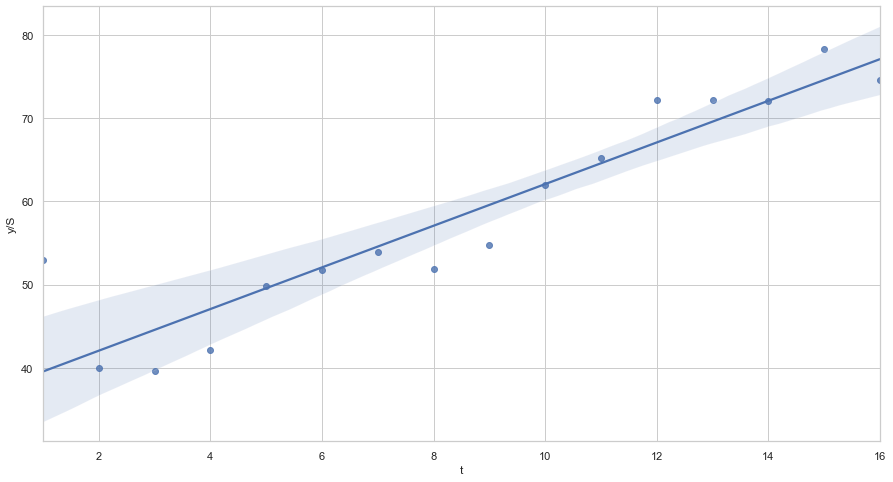

In [39]:
sns.set(style='whitegrid', rc={'figure.figsize' : (15,8)}) 
sns.regplot(x = 't', y = 'y/S', data = df3)

In [41]:
df4 = pd.DataFrame()
df4['t'] = df.t
df4['yt'] = df['реализация, т']
df4['S'] = df.S
df4['T'] = a0 + a1 * df4['t']
df4['y^'] = df4['T'] * df4['S']
df4['e'] = df4['yt'] - df4['y^']
df4['e^2'] = df4['e']**2
y_mean = df4['yt'].mean()
df4['(y-ycp)^2'] = (df4['yt'] - y_mean)**2
df4

,t,yt,S,T,y^,e,e^2,(y-ycp)^2
0,1,29.9,0.564349,39.5531,22.321757,7.578243,57.429763,798.415664
1,2,55.8,1.396344,42.0543,58.722271,-2.922271,8.539668,5.551914
2,3,53.9,1.362518,44.5555,60.707665,-6.807665,46.344299,18.115664
3,4,28.5,0.676789,47.0567,31.847456,-3.347456,11.205461,879.493164
4,5,28.1,0.564349,49.5579,27.967957,0.132043,0.017435,903.378164
5,6,72.3,1.396344,52.0591,72.692414,-0.392414,0.153989,200.045664
6,7,73.4,1.362518,54.5603,74.339383,-0.939383,0.882441,232.371914
7,8,35.1,0.676789,57.0615,38.618594,-3.518594,12.380505,531.590664
8,9,30.9,0.564349,59.5627,33.614157,-2.714157,7.366651,742.903164
9,10,86.5,1.396344,62.0639,86.662557,-0.162557,0.026425,803.368164


In [42]:
R2 = 1-(sum(df4['e^2'])/sum(df4['(y-ycp)^2']))
R2

0.9824181844794874

In [43]:
yt17 = a0 + a1*17
yt18 = a0 + a1*18
yt19 = a0 + a1*19
yt20 = a0 + a1*20

In [44]:
t = []
t.extend([17,18,19,20])
l = []
l.extend([yt17, yt18,yt19,yt20])
S = []
S.extend([0.564349,1.396344,1.362518,0.676789])
df5 = pd.DataFrame()
df5['t'] = t
df5['T'] = l
df5['S'] = S
df5['y^'] = df5['T'] * df5['S']
df5

,t,T,S,y^
0,17,79.5723,0.564349,44.906548
1,18,82.0735,1.396344,114.602839
2,19,84.5747,1.362518,115.234551
3,20,87.0759,0.676789,58.932011


In [45]:
df4 = df4.merge(df5, on=['t', 'T','S', 'y^'], how='outer')
df4

,t,yt,S,T,y^,e,e^2,(y-ycp)^2
0,1,29.9,0.564349,39.5531,22.321757,7.578243,57.429763,798.415664
1,2,55.8,1.396344,42.0543,58.722271,-2.922271,8.539668,5.551914
2,3,53.9,1.362518,44.5555,60.707665,-6.807665,46.344299,18.115664
3,4,28.5,0.676789,47.0567,31.847456,-3.347456,11.205461,879.493164
4,5,28.1,0.564349,49.5579,27.967957,0.132043,0.017435,903.378164
5,6,72.3,1.396344,52.0591,72.692414,-0.392414,0.153989,200.045664
6,7,73.4,1.362518,54.5603,74.339383,-0.939383,0.882441,232.371914
7,8,35.1,0.676789,57.0615,38.618594,-3.518594,12.380505,531.590664
8,9,30.9,0.564349,59.5627,33.614157,-2.714157,7.366651,742.903164
9,10,86.5,1.396344,62.0639,86.662557,-0.162557,0.026425,803.368164


<AxesSubplot:>

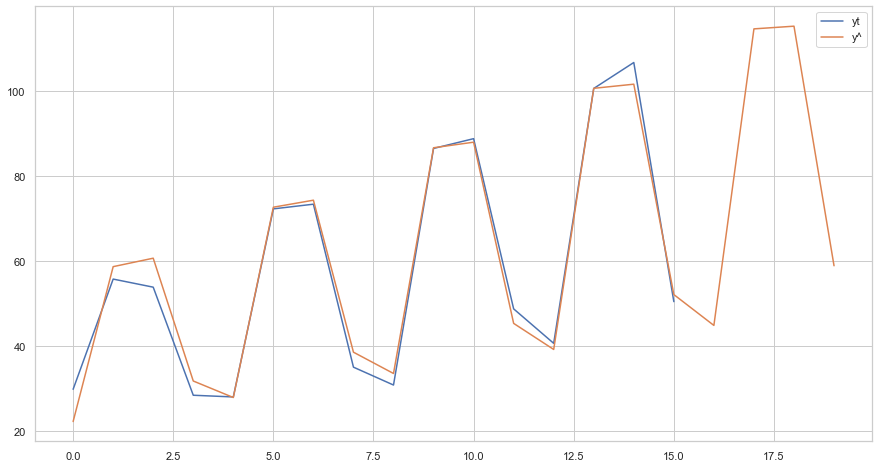

In [46]:
df4['yt'].plot(legend=True)
df4['y^'].plot(legend=True)

# Модель с фиктивной переменной

In [48]:
df6 = pd.read_csv('C:/Users/Honor/Music/1 задание.csv', sep=';')
col_names = {df6.columns[1]:'реализация, т', df6.columns[2]:'квартал'}
df6 = df6.rename(columns=col_names)
df6['реализация, т'] = df6['реализация, т'].str.replace(',','.')
df6['реализация, т'] = df6['реализация, т'].astype(float)
df6.head()

,t,"реализация, т",квартал
0,1,29.9,1
1,2,55.8,2
2,3,53.9,3
3,4,28.5,4
4,5,28.1,1


In [49]:
df6['S1'] = df.квартал.apply(lambda x: 1 if x==1 else 0)
df6['S2'] = df.квартал.apply(lambda x: 1 if x==2 else 0)
df6['S3'] = df.квартал.apply(lambda x: 1 if x==3 else 0)
df6

,t,"реализация, т",квартал,S1,S2,S3
0,1,29.9,1,1,0,0
1,2,55.8,2,0,1,0
2,3,53.9,3,0,0,1
3,4,28.5,4,0,0,0
4,5,28.1,1,1,0,0
5,6,72.3,2,0,1,0
6,7,73.4,3,0,0,1
7,8,35.1,4,0,0,0
8,9,30.9,1,1,0,0
9,10,86.5,2,0,1,0


In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

Y = df6['реализация, т']
X = df6[['t','S1','S2','S3']]

X = sm.add_constant(X)  
model = sm.OLS(Y, X)  
results = model.fit() 
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:          реализация, т   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     41.26
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.47e-06
Time:                        10:23:43   Log-Likelihood:                -52.536
No. Observations:                  16   AIC:                             115.1
Df Residuals:                      11   BIC:                             118.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3937      5.837      2.295      0.0

C:\Users\Honor\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p_value для S1 имеет значение 0.983
Это означает, что с этой вероятностью переменная S1 не объсняет динамику зависимой переменной
Поэтому убираем этот фактор и строим новую модель

In [51]:
Y = df6['реализация, т']
X = df6[['t','S2','S3']]

X = sm.add_constant(X) model = sm.OLS(Y, X) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          реализация, т   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     60.02
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.70e-07
Time:                        10:23:47   Log-Likelihood:                -52.536
No. Observations:                  16   AIC:                             113.1
Df Residuals:                      12   BIC:                             116.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3120      4.337      3.069      0.0

C:\Users\Honor\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


В данной модели все параметры являются стат. значимыми

In [52]:
a0_ = 13.3120
a1_ = 2.7354
a2_ = 43.6052
a3_ = 42.7698

In [53]:
df6['y^'] = a0_+a1_*df6['t']+a2_*df6['S2']+a3_*df6['S3']

In [54]:
t_ = [17, 18, 19, 20]
df7 = pd.DataFrame()
S1_ = [1, 0, 0, 0]
S2_ = [0, 1, 0, 0]
S3_ = [0, 0, 1, 0]
df7['t'] = t_
df7['S1'] = S1_
df7['S2'] = S2_
df7['S3'] = S3_
df7

,t,S1,S2,S3
0,17,1,0,0
1,18,0,1,0
2,19,0,0,1
3,20,0,0,0


In [55]:
df6 = df6.merge(df7, on=['t', 'S1','S2', 'S3'], how='outer')
df6['y^'] = a0_+a1_*df6['t']+a2_*df6['S2']+a3_*df6['S3']
df6['e'] = df6['реализация, т'] - df6['y^']
df4['e^2'] = df4['e']**2
y_mean = df6['реализация, т'].mean()
df6['(y-ycp)^2'] = (df6['реализация, т'] - y_mean)**2
df6

,t,"реализация, т",квартал,S1,S2,S3,y^,e,(y-ycp)^2
0,1,29.9,1.0,1,0,0,16.0474,13.8526,798.415664
1,2,55.8,2.0,0,1,0,62.3880,-6.5880,5.551914
2,3,53.9,3.0,0,0,1,64.2880,-10.3880,18.115664
3,4,28.5,4.0,0,0,0,24.2536,4.2464,879.493164
4,5,28.1,1.0,1,0,0,26.9890,1.1110,903.378164
5,6,72.3,2.0,0,1,0,73.3296,-1.0296,200.045664
6,7,73.4,3.0,0,0,1,75.2296,-1.8296,232.371914
7,8,35.1,4.0,0,0,0,35.1952,-0.0952,531.590664
8,9,30.9,1.0,1,0,0,37.9306,-7.0306,742.903164
9,10,86.5,2.0,0,1,0,84.2712,2.2288,803.368164


<AxesSubplot:>

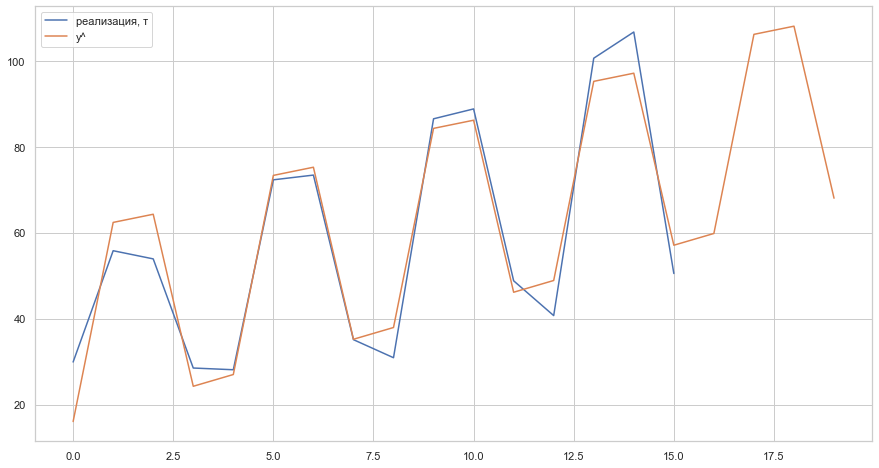

In [57]:
df6['реализация, т'].plot(legend=True)
df6['y^'].plot(legend=True)

# R**2 мультипликативной модели выше чем у модели с фиктиными переменными, поэтому для прогнозирования выбираем мултипликативную